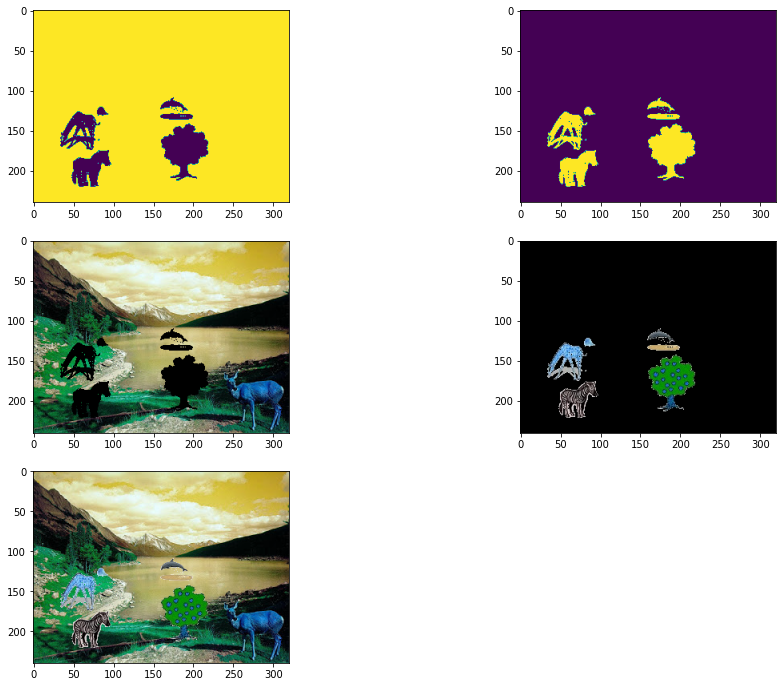

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def rgb_to_gray(img):
        grayImage = np.zeros(img.shape,dtype='uint8')
        R = np.array(img[:, :, 0])
        G = np.array(img[:, :, 1])
        B = np.array(img[:, :, 2])

        R = (R *.299)
        G = (G *.587)
        B = (B *.114)

        Avg = (R+G+B)
        grayImage = img

        for i in range(3):
           grayImage[:,:,i] = Avg

        return grayImage 

img1 = cv2.imread("img61.jpg")
img2 = cv2.imread("Sample_Image.jpg")

#YOUR CODE STARTS HERE

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
#tmp_img = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
tmp_img= img2
#img2gray = rgb_to_gray(tmp_img)
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray,225, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
plt.imshow(mask);

plt.subplot(3,2,2)
plt.imshow(mask_inv);
# Zero background where we want to overlay
img1_bg = img1
img1_bg[mask_inv>0]=0   
plt.subplot(3,2,3)
plt.imshow(img1_bg);

img2_fg = img2
img2_fg[mask==255]=0
plt.subplot(3,2,4)
plt.imshow(img2_fg);

# Add object to zeroed out space
#img1_bg += img2*(mask_inv>0)                                                                     
#plt.subplot(3,2,5)
#plt.imshow(img1_bg);
#plt.subplot(3,2,6)
#plt.imshow(img2);

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
plt.subplot(3,2,5)
plt.imshow(dst);

#YOUR CODE ENDS HERE


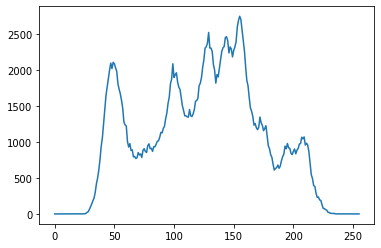

[162 162 162 ... 108 108 108]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 18, 60, 87, 177, 291, 411, 543, 660, 903, 1263, 1500, 1836, 2280, 2820, 3186, 3762, 4329, 4938, 5283, 5646, 5994, 6282, 6054, 6315, 6258, 6087, 5937, 5424, 5193, 5004, 4734, 4407, 3834, 3708, 3660, 3012, 2787, 2928, 2640, 2670, 2376, 2394, 2307, 2340, 2556, 2457, 2499, 2352, 2652, 2718, 2598, 2562, 2844, 2919, 2718, 2733, 2604, 2802, 2796, 2901, 3027, 3045, 3192, 3399, 3375, 3558, 3651, 3975, 4203, 4608, 4863, 5418, 5616, 6255, 5685, 5799, 5880, 5493, 5283, 5187, 4842, 4509, 4311, 4089, 4086, 4044, 4032, 4347, 4086, 4056, 4164, 4344, 4689, 4725, 4812, 5340, 5442, 5679, 6105, 6414, 6906, 6963, 7113, 7560, 6909, 6909, 6765, 6222, 5991, 5448, 5808, 5709, 6075, 6423, 6771, 6918, 6972, 7347, 7383, 7218, 6708, 6957, 6864, 6543, 6816, 6957, 7170, 7782, 8061, 8235, 8103, 7668, 7230, 6783, 6123, 5556, 5340, 4845, 4419, 4275, 4059, 3699, 3762, 3585, 3510, 3624, 4035, 3792, 3693, 3468, 355

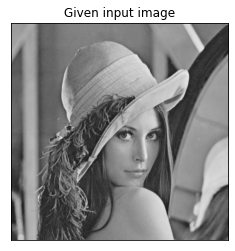

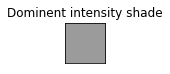

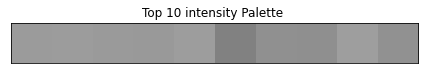

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def domIntensity(im, k):
    #YOUR CODE STARTS HERE
    
   

    # show the plotting graph of an image 
    plt.plot(histr) 
    plt.show() 

    # find frequency of pixels in range 0-255 
    bins = list(np.bincount(im.flatten()))
    print(bins)
    x={}
    for i in range(0,len(bins)):
        x[i]=bins[i]
        
    sorted_dict = dict( sorted(x.items(),
                           key=lambda item: item[1],
                           reverse=True))
    y = list(sorted_dict.keys())
    sorted_intensities = []
    for i in range(0,len(y)):
        sorted_intensities.append(tuple((y[i],y[i],y[i])))
    #YOUR CODE ENDS HERE
    return sorted_intensities[:k]

def displayIntensityPalette(im, dom_list):
    plt.figure()
    if len(im.shape) == 2:
        plt.imshow(im, cmap = "gray")
    else:
        plt.imshow(im)
    plt.xticks([])
    plt.yticks([])
    plt.title("Given input image")
    k = len(dom_list)
    # Most dominant intensity
    top_im = np.array([[dom_list[0]]])
    plt.figure(figsize = (0.75,0.75), frameon=False)
    plt.imshow(top_im)
    plt.title('Dominent intensity shade')
    plt.xticks([])
    plt.yticks([])
    # k most dominant intensity palette
    plt.figure(figsize = ((0.75*k),0.75), frameon=False)
    dom_inty_im = np.array([[dom_list[i] for i in range(k)]])
    plt.imshow(dom_inty_im)
    plt.xticks([])
    plt.yticks([])
    plt.title("Top 10 intensity Palette ")

im = cv2.imread("lena_gray_256.tif")
dom_list = domIntensity(im,10)
displayIntensityPalette(im, dom_list)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   2.   4.  15.
  18.  21.  25.  32.  39.  53.  60.  65.  69.  72.  75.  79.  82.  85.
  88.  92.  95.  99. 102. 107. 111. 115. 120. 124. 129. 133. 138. 143.
 147. 152. 157. 161. 166. 171. 176. 181. 186. 190. 195. 199. 203. 207.
 210. 214. 217. 221. 224. 226. 229. 231. 233. 236. 237. 239. 241. 243.
 244. 246. 247. 249. 250. 252. 253. 254. 254. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255.]


<Figure size 1152x864 with 0 Axes>

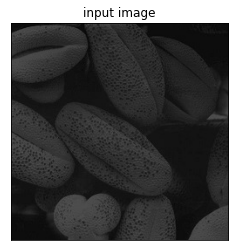

<Figure size 1152x864 with 0 Axes>

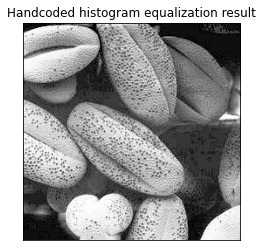

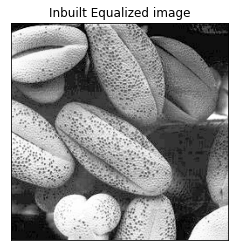

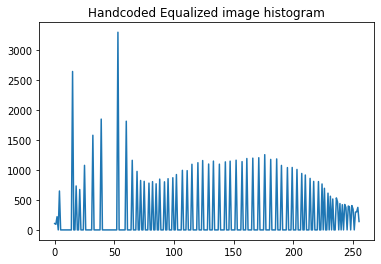

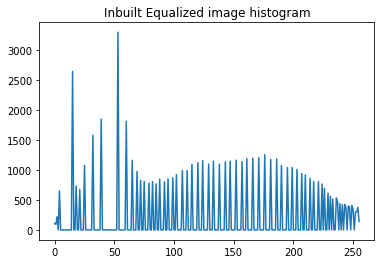

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

def plotHistogram(im):
    #YOUR CODE STARTS HERE

    imgHist = list(np.bincount(im.flatten()))

    #YOUR CODE ENDS HERE
    return imgHist
def cumsum(h):
	# finds cumulative sum of a numpy array, list
	return [sum(h[:i+1]) for i in range(len(h))]

def histogramEqualization(im):
    #YOUR CODE STARTS HERE

    #hist = np.bincount(img.flatten())
    #cdf = hist.cumsum()
    #cdf_normalized = cdf * hist.max()/ cdf.max()

    #cdf_m = np.ma.masked_equal(cdf,0)
    #cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    #cdf = np.ma.filled(cdf_m,0).astype('uint8')
    #im_new = cdf[img]
    '''H = np.zeros(shape=(256,1))
    for i in range(s[0]):
        for j in range(s[1]):
            k = im[i,j]
            H[k,0] = H[k,0] + 1
    hist = H.reshape(1,256)'''
    
    s = im.shape
    #calculate Histogram
    hist = np.bincount(im.flatten())
    pdf = hist/np.sum(hist)   #pdf
    cdf = np.cumsum(pdf)   #cumulative distribution function
    trans_func = np.round(cdf*(256-1))   #finding transfer function values
    
    im_new = np.zeros_like(im)
    # applying transfered values for each pixels
    for i in range(s[0]):
        for j in range(s[1]):
            k = im[i,j]
            im_new[i, j] = trans_func[k]
    #YOUR CODE ENDS HERE
    return im_new

he = cv2.imread('histogram3.jpg',0)
he1=cv2.cvtColor(he,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,12))
plt.figure()
plt.title("input image")
plt.imshow(he1)
plt.xticks([])
plt.yticks([])

# Implemented
eq_img= histogramEqualization(he)
hist=plotHistogram(eq_img)
eq_img=cv2.cvtColor(eq_img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16,12))
plt.figure()
plt.title("Handcoded histogram equalization result")
plt.imshow(eq_img)
plt.xticks([])
plt.yticks([])

#inbuilt
inbuilt_hist_img=cv2.equalizeHist(he)
inbuilt_hist = cv2.calcHist([eq_img], [0], None, [256], [0, 256])

plt.figure()
plt.title("Inbuilt Equalized image")
plt.imshow(inbuilt_hist_img, cmap = "gray")
plt.xticks([])
plt.yticks([])

plt.figure()
plt.title("Handcoded Equalized image histogram")
#plt.bar(range(256),hist)
plt.plot(hist)
plt.show()
plt.figure()
plt.title("Inbuilt Equalized image histogram")
plt.plot(inbuilt_hist)
plt.show()

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

im = cv2.imread('histogram3.jpg',0)
he1=cv2.cvtColor(he,cv2.COLOR_BGR2RGB)
#calculate Histogram
hist = np.bincount(im.flatten())
x = np.array([1,2,3])
pdf = hist/np.sum(hist)   #pdf
cdf = np.cumsum(pdf)
trans_func = np.round(cdf*(256-1))
y = np.uint8(cdf*(256-1))
print(trans_func)
print(y)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   2.   4.  15.
  18.  21.  25.  32.  39.  53.  60.  65.  69.  72.  75.  79.  82.  85.
  88.  92.  95.  99. 102. 107. 111. 115. 120. 124. 129. 133. 138. 143.
 147. 152. 157. 161. 166. 171. 176. 181. 186. 190. 195. 199. 203. 207.
 210. 214. 217. 221. 224. 226. 229. 231. 233. 236. 237. 239. 241. 243.
 244. 246. 247. 249. 250. 252. 253. 254. 254. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255.]
[  0   0   0   0   0   0   0   0   0   0   0   1   4  15  18  20  25  31
  39  52  60  64  68  72  75  78  81  84  88  91  95  98 102 106 110 114
 119 124 128 133 137 142 147 151 156 161 166 171 176 181 185 190 194 198
 202 206 210 213 217 220 223 226 228 231 233 235 237 239 240 242 244 245
 247 249 250 251 252 253 254 254 254 254 254 254 254 254 254 254 255]


In [14]:
# Question 5: Sequence of steps to enhance the image.

#1. (a).read image of whole body bone scan.
#2. (b) Laplacian of (a).
#3. (c) Sharpened image obtained by adding (a) and (b).
#4. (d) Sobel gradient of image (a).
#5. (e) Sobel image smoothed with a 5 × 5 box filter.
#6. (f) Mask image formed by the product of (b) and (e).
#7. (g) Sharpened image obtained by the adding images (a) and (f).
#8. (h) Final result obtained by applying a power-law transformation to (g).

#YOUR CODE STARTS HERE
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline 

img = cv2.imread('skeleton.tif')
s = img.shape
img_ary = np.asarray(img)

#padding the border with 0's
img_arr = np.full((s[0]+2,s[1]+2),1)
for i in range(1,s[0]+1):
    for j in range(1,s[1]+1):
        img_arr[i,j] = img_ary[i-1,j-1,0]
        
print(img_arr[0][0])
res1 = np.arange(s[0]*s[1]).reshape(s[0],s[1])
img_arr_fin = np.zeros_like(img_ary)
#applying laplacian on image
laplace_filter = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
for i in range(0,img_arr.shape[0]-2):
    for j in range(img_arr.shape[1]-2):
        sum = 0
        for p in range(laplace_filter.shape[0]):
            k=0
            for q in range(laplace_filter.shape[1]):
                sum += laplace_filter[p][q]*img_arr[i+p][j+k]
                k += 1
        img_arr_fin[i,j] = sum 
    
print(img_arr_fin)

#add the resultant image onto original image to get the sharpened image.
im_new = []
res2 = np.arange(s[0]*s[1]).reshape(s[0],s[1])
for i in range(s[0]):
    for j in range(s[1]):
        res2[i,j] = img[i,j,0] + img_arr_fin[i,j,0]
        res = img[i,j,0] + img_arr_fin[i,j,0]
        for k in range(3):
            im_new[i,j,k] = res


plt.figure(figsize=(16,12))
plt.figure()
plt.title("input image")
plt.imshow(img)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.figure()
plt.title("intermediate image")
plt.imshow(img_arr_fin)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.figure()
plt.title("output image")
plt.imshow(im_new)
plt.xticks([])
plt.yticks([])

#YOUR CODE ENDS HERE

1
[[[254 254 254]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [254 254 254]]

 [[255 255 255]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [255 255 255]]

 [[255 255 255]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [255 255 255]]

 ...

 [[255 255 255]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [255 255 255]]

 [[255 255 255]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [255 255 255]]

 [[254 254 254]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [254 254 254]]]


TypeError: list indices must be integers or slices, not tuple

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline 

filter = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
print(filter[3][3])

IndexError: index 3 is out of bounds for axis 0 with size 3

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:145: RuntimeWarning: invalid value encountered in power
C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:145: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:146: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 1152x864 with 0 Axes>

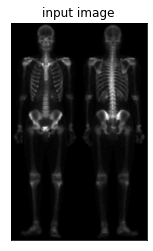

<Figure size 1152x864 with 0 Axes>

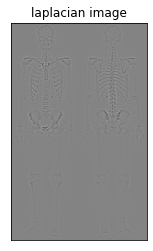

<Figure size 1152x864 with 0 Axes>

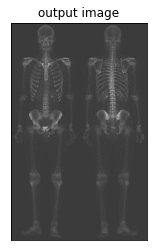

<Figure size 1152x864 with 0 Axes>

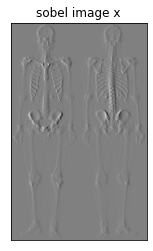

<Figure size 1152x864 with 0 Axes>

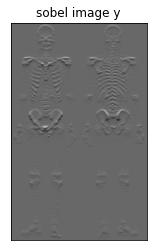

<Figure size 1152x864 with 0 Axes>

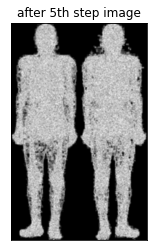

<Figure size 1152x864 with 0 Axes>

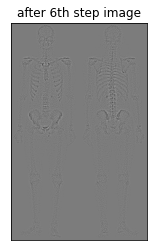

<Figure size 1152x864 with 0 Axes>

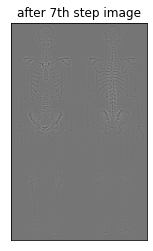

<Figure size 1152x864 with 0 Axes>

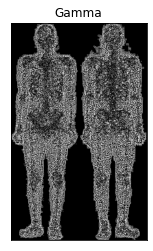

<Figure size 1152x864 with 0 Axes>

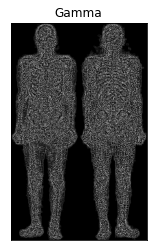

<Figure size 1152x864 with 0 Axes>

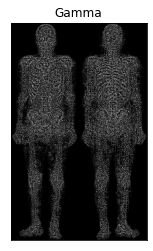

<Figure size 1152x864 with 0 Axes>

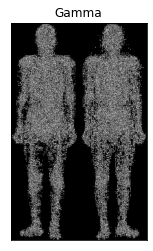

In [13]:
# Question 5: Sequence of steps to enhance the image.

#1. (a).read image of whole body bone scan.
#2. (b) Laplacian of (a).
#3. (c) Sharpened image obtained by adding (a) and (b).
#4. (d) Sobel gradient of image (a).
#5. (e) Sobel image smoothed with a 5 × 5 box filter.
#6. (f) Mask image formed by the product of (b) and (e).
#7. (g) Sharpened image obtained by the adding images (a) and (f).
#8. (h) Final result obtained by applying a power-law transformation to (g).

#YOUR CODE STARTS HERE

import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline 

#1. (a).read image of whole body bone scan.
img = cv2.imread('skeleton.tif')
# converting to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#2. (b) Laplacian of (a).
# Apply Laplace function
im2 = cv2.Laplacian(gray, cv2.CV_64F, ksize=3)

#3. (c) Sharpened image obtained by adding (a) and (b).(Subtracting because using positive laplacian operator)
im3 = gray - im2
'''
# Create kernel
kernel = np.array([[0, -1, 0], 
                   [-1, 5,-1], 
                   [0, -1, 0]])

# Sharpen image
im3 = cv2.filter2D(temp, -1, kernel)
'''
#4. (d) Sobel gradient of image (a).
scale = 1
delta = 0
ddepth = cv2.CV_16S  
# Gradient-X
grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3)
# Gradient-Y
grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3)

#converting back to CV_8U 
sobelx_16S = np.absolute(grad_x)
sobelx_8U =np.uint8(sobelx_16S)
sobely_16S = np.absolute(grad_y)
sobely_8U =np.uint8(sobely_16S)
#approximate the gradient by adding both directional gradients
#im4 = cv2.addWeighted(sobelx_8U, 0.5, sobely_8U, 0.5, 0)
im4 = np.float32(np.sqrt(sobelx_8U**2 + sobely_8U**2))

#5. (e) Sobel image smoothed with a 5 × 5 box filter.
kernel = np.ones((5,5),np.float32)/25
im5 = cv2.filter2D(im4,-1,kernel)
#averaging 
#im5 = cv2.blur(im4,(5,5))

#6. (f) Mask image formed by the product of (b) and (e).
im6 = im2*im5
'''kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]], np.float32)
im6 = cv2.filter2D(prod, -1, kernel)'''
# ddepth = -1, means destination image has depth same as input image

#7. (g) Sharpened image obtained by the adding images (a) and (f).
im7 = gray + im6
'''
# Create kernel
kernel = np.array([[0, -1, 0], 
                   [-1, 5,-1], 
                   [0, -1, 0]])

# Sharpen image
im7 = cv2.filter2D(add, -1, kernel)
'''

plt.figure(figsize=(16,12))
plt.figure()
plt.title("input image")
plt.imshow(img)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.figure()
plt.title("laplacian image")
plt.imshow(im2)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.figure()
plt.title("output image")
plt.imshow(im3)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.figure()
plt.title("sobel image x")
plt.imshow(grad_x)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.figure()
plt.title("sobel image y")
plt.imshow(grad_y)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.figure()
plt.title("after 5th step image")
plt.imshow(im5)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.figure()
plt.title("after 6th step image")
plt.imshow(im6)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.figure()
plt.title("after 7th step image")
plt.imshow(im7)
plt.xticks([])
plt.yticks([])

#8. (h) Final result obtained by applying a power-law transformation to (g).
# Trying 4 gamma values. 
for gamma in [0.1, 0.5, 1.2, 3]: 
      
    # Apply gamma correction. 
    im8 = np.array(255*(im7 / 255) ** gamma, dtype = 'uint8') 
    plt.figure(figsize=(16,12))
    plt.figure()
    plt.title("Gamma")
    plt.imshow(im8)
    plt.xticks([])
    plt.yticks([])
    
#YOUR CODE ENDS HERE

'\nplt.figure(figsize=(16,12))\nplt.figure()\nplt.title("image")\nplt.imshow(mask_img)\nplt.xticks([])\nplt.yticks([])\n\nplt.figure(figsize=(16,12))\nplt.figure()\nplt.title("image after")\nplt.imshow(img2)\nplt.xticks([])\nplt.yticks([])'

<Figure size 1152x864 with 0 Axes>

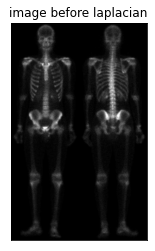

<Figure size 1152x864 with 0 Axes>

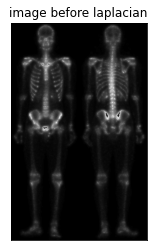

<Figure size 1152x864 with 0 Axes>

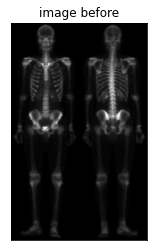

<Figure size 1152x864 with 0 Axes>

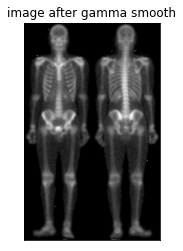

<Figure size 1152x864 with 0 Axes>

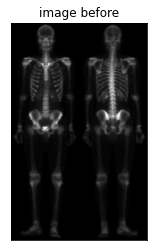

<Figure size 1152x864 with 0 Axes>

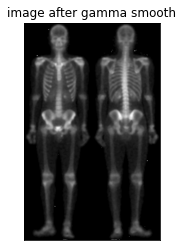

<Figure size 1152x864 with 0 Axes>

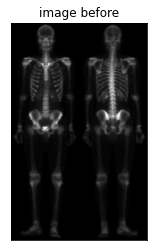

<Figure size 1152x864 with 0 Axes>

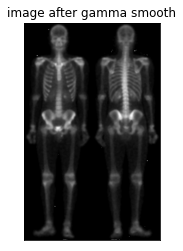

<Figure size 1152x864 with 0 Axes>

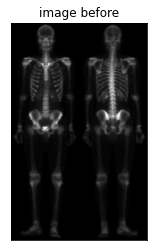

<Figure size 1152x864 with 0 Axes>

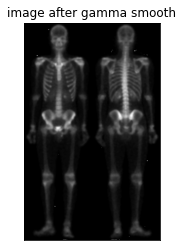

In [9]:
#1. (a).read image of whole body bone scan.
#2. (b) Laplacian of (a).
#3. (c) Sharpened image obtained by adding (a) and (b).
#4. (d) Sobel gradient of image (a).
#5. (e) Sobel image smoothed with a 5 × 5 box filter.
#6. (f) Mask image formed by the product of (b) and (e).
#7. (g) Sharpened image obtained by the adding images (a) and (f).
#8. (h) Final result obtained by applying a power-law transformation to (g).

import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline 

scale = 1
delta = 0
ddepth = cv2.CV_16S
kernel_size = 3

#1. (a).read image of whole body bone scan.
src = cv2.imread('skeleton.tif', cv2.IMREAD_COLOR) # Load an image
# Convert the image to grayscale
im2 = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
src_gray = cv2.blur(im2,(5,5))

#2. (b) Laplacian of (a).
# Apply Laplace function
dst = cv2.Laplacian(src_gray, ddepth, ksize=kernel_size)
# converting back to uint8
abs_dst = cv2.convertScaleAbs(dst)

#3. (c) Sharpened image obtained by adding (a) and (b).
img = src_gray + abs_dst 
img_laplacian = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(16,12))
plt.figure()
plt.title("image before laplacian")
plt.imshow(src)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.figure()
plt.title("image before laplacian")
plt.imshow(img_laplacian)
plt.xticks([])
plt.yticks([])
#img = src + img_temp

#4. (d) Sobel gradient of image (a).
gray = src_gray
# Gradient-X
grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=9, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
# Gradient-Y
grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=9, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
#grad = np.float32(np.sqrt(np.square(abs_grad_x) + np.square(abs_grad_y)))

#5. (e) Sobel image smoothed with a 5 × 5 box filter.
kernel = np.ones((5,5),np.float32)/25
#img_smooth = cv2.filter2D(grad,-1,kernel)
img_smooth = cv2.medianBlur(grad,5)
#averaging 
#img_smooth = cv2.blur(grad,(5,5))
img_sobel = cv2.cvtColor(img_smooth, cv2.COLOR_GRAY2BGR)

#6. (f) Mask image formed by the product of (b) and (e).
mask_img = cv2.multiply(img,img_smooth)

#7. (g) Sharpened image obtained by the adding images (a) and (f).
img_g = src_gray + mask_img

#8. (h) Final result obtained by applying a power-law transformation to (g).
# Trying 4 gamma values. 
#for gamma in [0.5, 0.6, 0.7, 0.8]: 
      
    # Apply gamma correction.
    gamma = 0.5
    gamma_corrected = np.array(255*(img_g / 255) ** gamma, dtype = 'uint8')
    img_gsmooth = cv2.medianBlur(gamma_corrected,5)
    img_gamma = cv2.cvtColor(img_gsmooth, cv2.COLOR_GRAY2BGR)
    
    # Remove noise by blurring with a Gaussian filter
    #img_gsmooth = cv2.GaussianBlur(img_gsmooth, (3, 3), 0)
    plt.figure(figsize=(16,12))
    plt.figure()
    plt.title("image before")
    plt.imshow(src)
    plt.xticks([])
    plt.yticks([])
    
    plt.figure(figsize=(16,12))
    plt.figure()
    plt.title("image after gamma smooth")
    plt.imshow(img_gamma)
    plt.xticks([])
    plt.yticks([])
    
'''
plt.figure(figsize=(16,12))
plt.figure()
plt.title("image")
plt.imshow(mask_img)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.figure()
plt.title("image after")
plt.imshow(img2)
plt.xticks([])
plt.yticks([])'''

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


([], [])

<Figure size 1152x864 with 0 Axes>

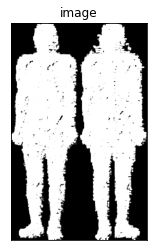

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline 

scale = 1
delta = 0
ddepth = cv2.CV_16S
# Load the image
src = cv2.imread('skeleton.tif', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)  
    
grad_x = cv2.Sobel(gray, -1, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
# Gradient-Y
grad_y = cv2.Sobel(gray, -1, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad = np.sqrt(grad_x**2 + grad_y**2)
grad_norm = (grad * 255 / grad.max()).astype(np.uint8)    
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
grad = np.float32(np.sqrt(np.square(grad_x) + np.square(grad_y)))

#grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
kernel = np.ones((5,5),np.float32)/25
img_smooth = cv2.filter2D(grad,-1,kernel)
#averaging 
#img_smooth = cv2.blur(grad,(5,5))
img_temp = cv2.cvtColor(img_smooth, cv2.COLOR_GRAY2BGR)


plt.figure(figsize=(16,12))
plt.figure()
plt.title("image")
plt.imshow(img_temp)
plt.xticks([])
plt.yticks([])

([], [])

<Figure size 1152x864 with 0 Axes>

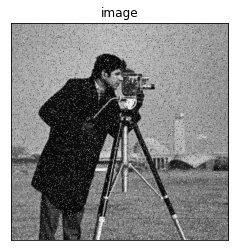

<Figure size 1152x864 with 0 Axes>

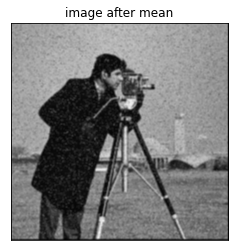

<Figure size 1152x864 with 0 Axes>

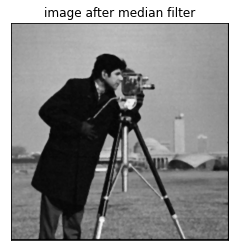

<Figure size 1152x864 with 0 Axes>

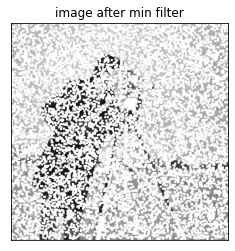

<Figure size 1152x864 with 0 Axes>

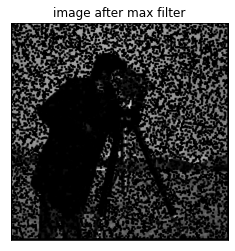

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

#YOUR CODE STARTS HERE
def meanFilter(im, size):
    # Obtain number of rows and columns  
    # of the image 
    img1 = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    m, n = img1.shape 

    # Develop Averaging filter(3, 3) mask 
    mask = np.ones([size, size], dtype = int) 
    mask = mask / (size*size)

    #Form new padded matrix
    new_m = m+size-1
    new_n = n+size-1
    img_new = np.zeros([new_m, new_n]) 
    img_new1 = np.zeros([m, n]) 
    
    if size==3:
        for i in range(1, m): 
            for j in range(1, n): 
                img_new[i, j] = img1[i-1, j-1]
                
        img = img_new
        # Convolve the 3X3 mask over the image  
        for i in range(1, new_m-1): 
            for j in range(1, new_n-1): 
                k = img[i-1:i+2,j-1:j+2]
                l = np.sum(np.multiply(k,mask))
                img_new1[i-1, j-1]= l  

    if size==5:
        for i in range(2, m): 
            for j in range(2, n): 
                img_new[i, j] = img1[i-2, j-2]
                
        img = img_new
        # Convolve the 5X5 mask over the image
        for i in range(2, new_m-2): 
            for j in range(2, new_n-2): 
                k = img[i-2:i+3,j-2:j+3]
                l = np.sum(np.multiply(k,mask))
                img_new1[i-2, j-2]= l 
    
    img_new1 = img_new1.astype(np.uint8)

    im_new = cv2.cvtColor(img_new1,cv2.COLOR_GRAY2BGR)
    return im_new

def medianFilter(im, size):
    img1 = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    # Obtain the number of rows and columns  
    # of the image 
    m, n = img1.shape 
    
    # Traverse the image. For every 3X3 area,  
    # find the median of the pixels and 
    # replace the ceter pixel by the median
    # Form new padded matrix
    new_m, new_n = m+size-1, n+size-1
    img_new = np.zeros([m+size-1, n+size-1]) 
    img_new1 = np.zeros([m, n]) 
            
    if size==3:
        for i in range(1, m): 
            for j in range(1, n): 
                img_new[i, j] = img1[i-1, j-1]

        img = img_new
        for i in range(1, new_m-1): 
            for j in range(1, new_n-1): 

                k = img[i-1:i+2,j-1:j+2]
                l = np.median(k)
                img_new1[i-1, j-1]= l

    if size==5:
        for i in range(2, m): 
            for j in range(2, n): 
                img_new[i, j] = img1[i-2, j-2]
         
        img = img_new
        for i in range(2, new_m-2): 
            for j in range(2, new_n-2): 

                k = img[i-2:i+3,j-2:j+3]
                l = np.median(k)
                img_new1[i-2, j-2]= l

    img_new1 = img_new1.astype(np.uint8)
    im_new = cv2.cvtColor(img_new1,cv2.COLOR_GRAY2BGR)
    return im_new

def minFilter(im, size):
    img1 = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    # Obtain the number of rows and columns  
    # of the image 
    m, n = img1.shape 
    
    # Traverse the image. For every 3X3 area,  
    # find the median of the pixels and 
    # replace the ceter pixel by the median
    # Form new padded matrix
    new_m, new_n = m+size-1, n+size-1
    img_new = np.zeros([m+size-1, n+size-1]) 
    img_new1 = np.zeros([m, n]) 
            
    if size==3:
        for i in range(1, m): 
            for j in range(1, n): 
                img_new[i, j] = img1[i-1, j-1]
            
        img = img_new
        for i in range(1, new_m-1): 
            for j in range(1, new_n-1): 
                k = img[i-1:i+2,j-1:j+2]
                l = np.max(k)
                img_new1[i-1, j-1]= l
                
    if size==5:
        for i in range(2, m): 
            for j in range(2, n): 
                img_new[i, j] = img1[i-2, j-2]
        img = img_new
        for i in range(2, new_m-2): 
            for j in range(2, new_n-2): 
                k = img[i-2:i+3,j-2:j+3]
                l = np.max(k)
                img_new1[i-2, j-2]= l

    img_new1 = img_new1.astype(np.uint8)
    im_new = cv2.cvtColor(img_new1,cv2.COLOR_GRAY2BGR)
    return im_new

def maxFilter(im, size):
    img1 = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    # Obtain the number of rows and columns  
    # of the image 
    m, n = img1.shape 

    # Traverse the image. For every 3X3 area,  
    # find the median of the pixels and 
    # replace the ceter pixel by the median
    # Form new padded matrix
    new_m, new_n = m+size-1, n+size-1
    img_new = np.zeros([m+size-1, n+size-1]) 
    img_new1 = np.zeros([m, n]) 
            
    if size==3:
        for i in range(1, m): 
            for j in range(1, n): 
                img_new[i, j] = img1[i-1, j-1]
            
        img = img_new
        for i in range(1, new_m-1): 
            for j in range(1, new_n-1): 
                k = img[i-1:i+2,j-1:j+2]
                l = np.min(k)
                img_new1[i-1, j-1]= l
    if size==5:
        for i in range(2, m): 
            for j in range(2, n): 
                img_new[i, j] = img1[i-2, j-2]
        img = img_new    
        for i in range(2, new_m-2): 
            for j in range(2, new_n-2): 
                k = img[i-2:i+3,j-2:j+3]
                l = np.min(k)
                img_new1[i-2, j-2]= l
                
    img_new1 = img_new1.astype(np.uint8)
    im_new = cv2.cvtColor(img_new1,cv2.COLOR_GRAY2BGR)
    return im_new

img = cv2.imread('Cameraman_SandP_0.08.jpg')
size = 5
im1 = meanFilter(img, size)
im2 = medianFilter(img, size)
im3 = minFilter(img, size)
im4 = maxFilter(img, size)

plt.figure(figsize=(16,12))
plt.figure()
plt.title("image")
plt.imshow(img)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.figure()
plt.title("image after mean")
plt.imshow(im1)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.figure()
plt.title("image after median filter")
plt.imshow(im2)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.figure()
plt.title("image after min filter")
plt.imshow(im3)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.figure()
plt.title("image after max filter")
plt.imshow(im4)
plt.xticks([])
plt.yticks([])

#YOUR CODE ENDS HERE

0.9482604488423959
(137, 0)
(221, 126)


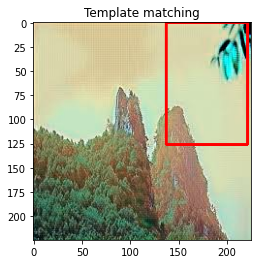

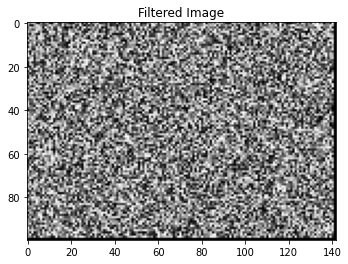

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image
%matplotlib inline

# Implement Linear Filtering technique on an image using a linear filter #correlation
def linear_filter(image, filter_): # 'filter' is a keyword in python, so is the underscore at the end.
    """
    Performs linear filtering on an image.
    Assume image size is W1xW2, filter size is F1xF2.
    
    Arguments:
    image -- input image possibly with 3 channels(RGB).
    filter_ -- linear filter to apply on image.
    
    Returns:
    result -- filtered image. 
    """
    # DO NOT CHAGE THIS CODE    
    #image = np.array(image.convert('L')) # converts image to gray scale, so that it is easy to apply filter
    src = image
    image = np.array(cv2.cvtColor(image,cv2.COLOR_BGR2GRAY))
    image_height, image_width = image.shape[0], image.shape[1]

    #filter_ = np.array(filter_.convert('L')) 
    filter_ = np.array(cv2.cvtColor(filter_,cv2.COLOR_BGR2GRAY))
    filter_height, filter_width = filter_.shape[0], filter_.shape[1]
   
    # result shape will be of size --> (((W1−F1+2P) / S) + 1) x (((W2−F2+2P) / S) + 1), where 'P' is padding length
    # S is stride length, if you don't know about them, don't worry, you will learn in upcoming lectures.For now
    # we will use simplest setting P=0,S=1. See the next line.

    result_height, result_width = (image_height - filter_height) + 1, (image_width - filter_width) + 1
    result = np.array([[0 for j in range(result_width)] for i in range(result_height)])
    
    # YOUR CODE STARTS HERE
    filtered_image = result
    h = int(filter_height/2)
    w = int(filter_width/2)
    max_match = 0.0
    color = (255, 0, 0) 
    
    # Line thickness of 2 px 
    thickness = 2
    for i in range(h, image_height-h):
        for j in range(w, image_width-w):
            k = image[i-h:i+h,j-w:j+w]  
            k = k.astype('float')
            l = np.sum(np.multiply(k,filter_))
            l = l.astype('float')
            mag = float(np.linalg.norm(k)*np.linalg.norm(filter_))
            res = float(l/mag)
            if res> max_match:
                max_match = res
                start_point = (j-w, i-h)
                end_point = (j+w, i+h)
            filtered_image[i-h, j-w] = l
    
    print(max_match)
    print(start_point)
    print(end_point)
    filtered_image = filtered_image.astype(np.uint8)
    filtered_image = cv2.cvtColor(filtered_image,cv2.COLOR_GRAY2BGR)
    image = image.astype(np.uint8)
    image = cv2.cvtColor(image,cv2.COLOR_GRAY2BGR)
    image = cv2.rectangle(src, start_point, end_point, color, thickness) 
    plt.imshow(image)
    plt.title('Template matching results')
    plt.show()
    # YOUR CODE ENDS HERE
    return filtered_image



# To test your implementation, run the below code.
image = cv2.imread('hills.jpeg')
filter_ = cv2.imread('template.png')
result = linear_filter(image, filter_)

plt.imshow(result)
plt.title('Filtered Image')
plt.show()


In [31]:
import numpy as np

a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(a[0:2,0:3])

[[1 2 3]
 [5 6 7]]


<Figure size 1152x864 with 0 Axes>

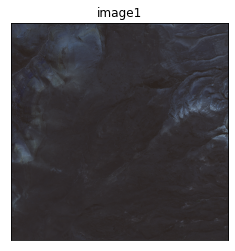

<Figure size 1152x864 with 0 Axes>

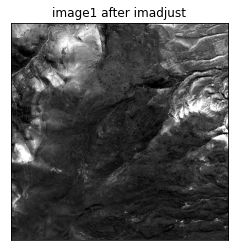

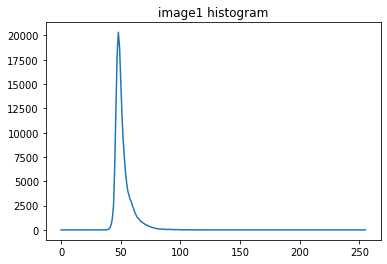

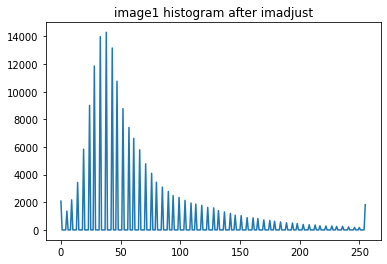

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# YOUR CODE STARTS HERE
import bisect

def imadjust(x,a,b,c,d,gamma=1):
    # Similar to imadjust in MATLAB.
    # Converts an image range from [a,b] to [c,d].
    # The Equation of a line can be used for this transformation:
    #   y=((d-c)/(b-a))*(x-a)+c
    # However, it is better to use a more generalized equation:
    #   y=((x-a)/(b-a))^gamma*(d-c)+c
    # If gamma is equal to 1, then the line equation is used.
    # When gamma is not equal to 1, then the transformation is not linear.

    y = (((x - a) / (b - a)) ** gamma) * (d - c) + c
    return y

def imadjust1(src, vin=[0,255], vout=(0,255)):
    # src : input one-layer image (numpy array)
    # vin  : src image bounds
    # vout : dst image bounds
    # return : output img

    assert len(src.shape) == 2 ,'Input image should be 2-dims'

    # Compute in and out limits
    # Histogram
    hist = np.histogram(src,bins=list(range(256)),range=(0,255))[0]

    # Cumulative histogram
    cum = hist.copy()
    for i in range(1, len(hist)): cum[i] = cum[i - 1] + hist[i]

    # Compute bounds
    total = src.shape[0] * src.shape[1]
    low_bound = total * 1 / 100    # 1%
    upp_bound = total * (100 - 1) / 100
    #finding the bottom most 1& intensities
    vin[0] = bisect.bisect_left(cum, low_bound)
    vin[1] = bisect.bisect_left(cum, upp_bound)

    # Stretching
    scale = (vout[1] - vout[0]) / (vin[1] - vin[0])
    vs = src-vin[0]
    #top 1% lowest values are being made 0
    vs[src<vin[0]]=0
    #scaling
    vd = vs*scale+0.5 + vout[0]
    vd[vd>vout[1]] = vout[1]
    dst = vd

    return dst

img1 = cv2.imread('haze1.tif')
img2 = cv2.imread('haze2.tif')
img1ary = np.asarray(img1)
img2ary = np.asarray(img2)
#img1arr = imadjust(img1ary,img1ary.min(),img1ary.max(),0,255)
img1arygray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img1arr = imadjust1(img1arygray)
img1arr = img1arr.astype(np.uint8)
img1arr = cv2.cvtColor(img1arr,cv2.COLOR_GRAY2BGR)
hist1 = cv2.calcHist([img1], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([img1arr], [0], None, [256], [0, 256])
plt.figure(figsize=(16,12))
plt.figure()
plt.title("image1")
plt.imshow(img1)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.figure()
plt.title("image1 after imadjust")
plt.imshow(img1arr)
plt.xticks([])
plt.yticks([])

plt.figure()
plt.title("image1 histogram")
plt.plot(hist1)
plt.show()
    
plt.figure()
plt.title("image1 histogram after imadjust")
plt.plot(hist2)
plt.show()
    
    
# YOUR CODE ENDS HERE